In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('data/kaggle_plain_text_wiki/number.parquet')
df.head()

,id,title,text,categories
0,18467655,0 + 2 = 1,0 + 2 = 1 is the fifth full-length album by Ca...,"[1991 albums, Nomeansno albums, Alternative Te..."
1,52770645,0 + 2 = 1 ½,0 + 2 = 1 is a compilation album by Vancouver ...,"[2010 compilation albums, Nomeansno albums]"
2,1814464,0 A.D. (video game),0 A.D. is a free and open-source real-time str...,"[Creative Commons-licensed video games, Crowdf..."
3,50753424,0 Avenue,0 Avenue (Zero Avenue) is a road in the Lower ...,"[Canada–United States border, Transport in Abb..."
4,60592445,0 Day Attack on Earth,0 Day Attack on Earth is an multidirectional s...,"[2009 video games, Action games, Alien invasio..."


In [ ]:
# print the categories column all
pd.set_option('display.max_colwidth', 100) # 100 is the limit length, when set to None, it will print all
df['categories'].head(20)

0                   [Defunct firearms manufacturers, Defunct manufacturing companies based in California]
1     [Encyclopædia Britannica, Ornithological publishing companies, Publishing companies established ...
2                                                                                          [Cotton mills]
3     [Locomotive manufacturers of New Zealand, Thames-Coromandel District, Vehicle manufacturing comp...
4     [1904 establishments in the United States, Armenian- American culture in New York City, Armenian...
5     [Art Deco architecture in Missouri, Buildings and structures in St. Louis, Commercial buildings ...
6     [1958 establishments in New York City, 1958 in New York City, 1989 disestablishments in New York...
7     [1965 films, West German films, German animated short films, 1960s French-language films, 1965 a...
8     [1998 films, Japanese documentary films, 1998 documentary films, Aum Shinrikyo, Documentary film...
9     [Films set in Bangalore, 1998 films, 199

In [ ]:
print(df.iloc[1000]['text'])
print(len(df.iloc[1000]['text']))
len(df.iloc[1000]['text'].split())

A Child Is Born is an album of Christmas carols by pianist Geri Allen with vocalists recorded in 2011 and released on the Motéma label.Geri Allen catalog, accessed July 2, 2014 == Reception == AllMusic awarded the album 4 stars, stating, "this is a holiday collection for the more adventurous jazz piano fan, rather than for someone looking for a safe, warm, and fuzzy set of jazzed-up Christmas tunes".Ruhlmann, W., Allmusic Review accessed June 30, 2014 The Guardian review by John Fordham awarded the album 3 stars, noting, "Wherever you're coming from, this remains the work of a gifted improviser exploring timelessly haunting songs".Fordham, J., The Guardian Review, December 23, 2011 PopMatters reviewer Josh Langhoff said, "Geri Allen’s mostly-solo, mostly-jazz-piano album A Child Is Born flows through traditional Christmas songs and hymns with much facility, some invention, and a couple of surprises"Langhoff, J., PopMatters Review, December 11, 2011 == Track listing == All compositions 

367

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to remove warnings in jupyter notebook
# import warnings
# warnings.filterwarnings('ignore')

sns.set(color_codes=True)
# new version without warning
# sns.displot(df['text'].str.len().loc[lambda x: x < 1000])
sns.distplot(df['text'].str.len().loc[lambda x: x < 1000])
plt.show()
sns.distplot(df['text'].str.len().loc[lambda x: x < 2000])
plt.show()
sns.distplot(df['text'].str.len().loc[lambda x: x < 5000])
plt.show()
sns.distplot(df['text'].str.len().loc[lambda x: x < 20000])
plt.show()

# if i only use one "plt.show()" in the end, it will show four plot lines in one figure
# if i use four "plt.show()" in the end, it will show four plot lines in four figures one by one

In [4]:
def distribution(data_path):
    df = pd.read_parquet(data_path)

    fig, axes = plt.subplots(1, 4, figsize=(8, 2))

    sns.distplot(df['text'].str.len().loc[lambda x: x < 1000], ax=axes[0])
    axes[0].set_title("Text Length < 1000")

    sns.distplot(df['text'].str.len().loc[lambda x: x < 2000], ax=axes[1])
    axes[1].set_title("Text Length < 2000")

    sns.distplot(df['text'].str.len().loc[lambda x: x < 5000], ax=axes[2])
    axes[2].set_title("Text Length < 5000")

    sns.distplot(df['text'].str.len().loc[lambda x: x < 20000], ax=axes[3])
    axes[3].set_title("Text Length < 20000")

    plt.tight_layout()
    plt.show()

    # free up the memory
    plt.close()
    del df

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data_folder = 'data/kaggle_plain_text_wiki/'

# for file in data_folder, if file end with .parquet, then do distribution
import os

for file in os.listdir(data_folder):
    if file.endswith(".parquet"):
        distribution(os.path.join(data_folder, file))

# def parquet_data_generator(data_folder):
#     for file in os.listdir(data_folder):
#         if file.endswith(".parquet"):
#             yield pd.read_parquet(os.path.join(data_folder, file))

# for df in parquet_data_generator(data_folder):
#     distribution(df)

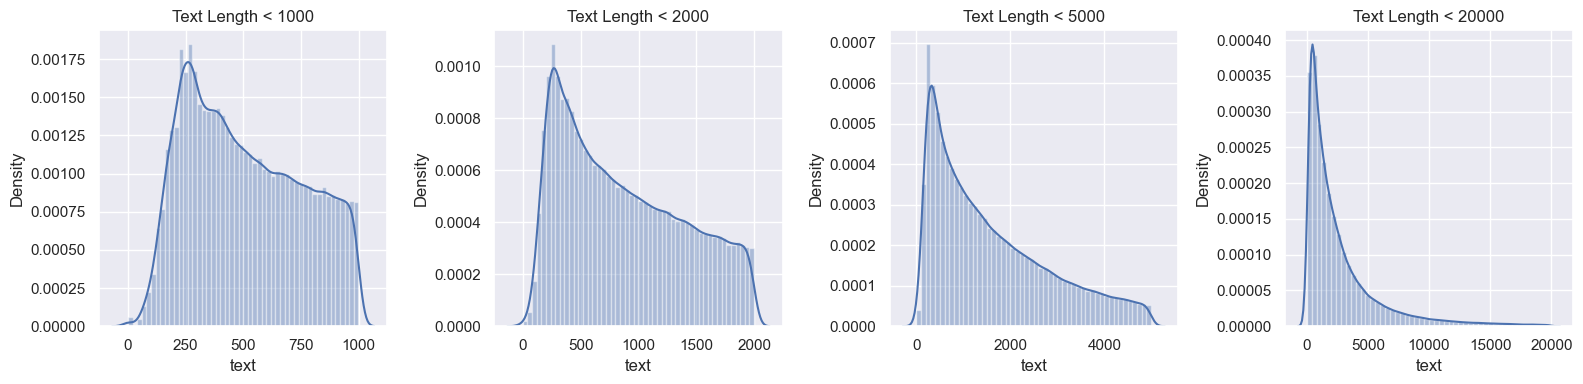

In [ ]:
# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot the first distribution on the first subplot
sns.distplot(df['text'].str.len().loc[lambda x: x < 1000], ax=axes[0])
axes[0].set_title("Text Length < 1000")

# Plot the second distribution on the second subplot
sns.distplot(df['text'].str.len().loc[lambda x: x < 2000], ax=axes[1])
axes[1].set_title("Text Length < 2000")

# Plot the third distribution on the third subplot
sns.distplot(df['text'].str.len().loc[lambda x: x < 5000], ax=axes[2])
axes[2].set_title("Text Length < 5000")

# Plot the fourth distribution on the fourth subplot
sns.distplot(df['text'].str.len().loc[lambda x: x < 20000], ax=axes[3])
axes[3].set_title("Text Length < 20000")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()